In [1]:
# customer data analysis

In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
import seaborn as sns
%matplotlib inline

In [7]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [8]:
import extra_graphs

# load data

In [9]:
customers = pd.read_csv("customers.csv")

# simple exploration

In [10]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
print("Missing values in each variable: \n{}".format(customers.isnull().sum()))

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [12]:
print("Duplicated rows: {}".format(customers.duplicated().sum()))

Duplicated rows: 0


In [13]:
print("Variable:                  Type: \n{}".format(customers.dtypes)) 

Variable:                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


# Descriptive statistics and Distribution

In [14]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [15]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [16]:
spending = customers["Spending Score (1-100)"]
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



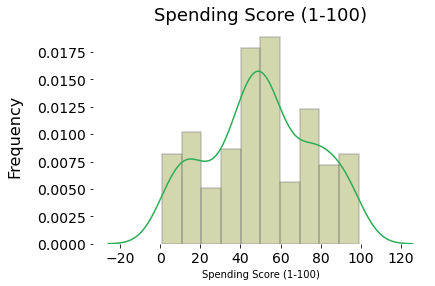

In [17]:
graph_histo(spending)

In [18]:
age = customers["Age"]
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



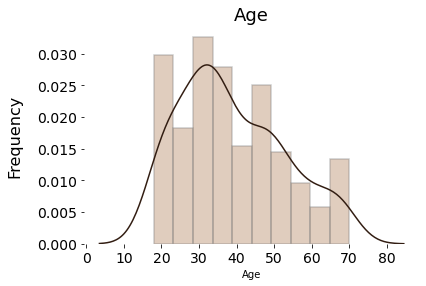

In [19]:
graph_histo(age)

In [20]:
income = customers["Annual Income (k$)"]
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



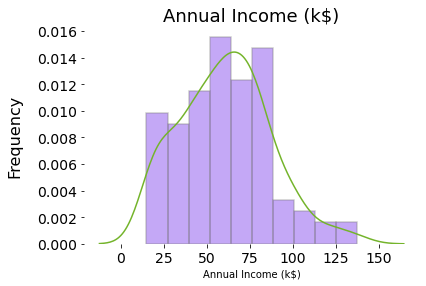

In [21]:
graph_histo(income)

In [22]:
gender = customers["Gender"]
#print(gender)


count_Male = len(customers[customers['Gender'].isin(['Male'])] )
print ("count_Male",(count_Male))
count_Female = len (customers[customers['Gender'].isin(['Female'])] )
print ("count_Female",(count_Female))

count_Male 88
count_Female 112


In [23]:
statistics(gender)

,Gender
Female,112
Male,88


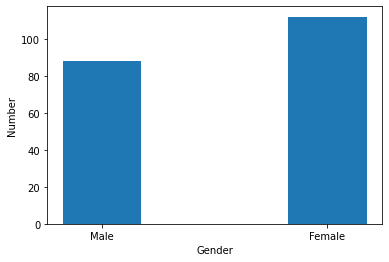

In [24]:
import matplotlib.pyplot as plt 

plt.xlabel("Gender")
plt.ylabel("Number")

plt.xticks((0,1),("Male","Female"))
xlist = [0,1]
ylist=[count_Male,count_Female]

plt.bar(x=xlist,height=ylist,width = 0.35,align="center")

plt.show()

# encode age & gender

In [25]:
def encode_Age(old):
    if old <=35:
        return 0
    else:
        return 1

one_column = customers["Age"]
one_column = one_column.apply(encode_Age )
customers["Age2"] =one_column

customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age2
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [26]:
def encode_Gender(old):
    if old == 'Male':
        return 0
    elif old == 'Female':
        return 1
    else:
        return 0

one_column = customers["Gender"]
one_column = one_column.apply(encode_Gender )
customers["Gender2"] =one_column

customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age2,Gender2
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [27]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age2,Gender2
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


# box plot on Annual Income (k$) vs all

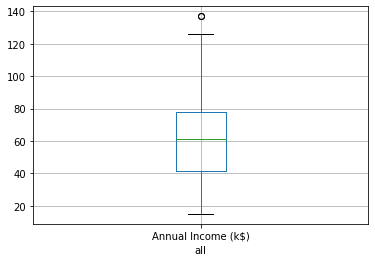

In [28]:
#box
customers.boxplot(column=["Annual Income (k$)"],showfliers=True)
plt.xlabel("all")
plt.show()



# box plot Annual Income (k$) vs male female

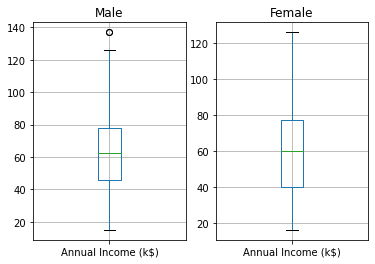

In [29]:
df_male = customers[customers.Gender =='Male']
df_female = customers[customers.Gender == 'Female']


fig, axes = plt.subplots(1,2) # create figure and axes
df_male.boxplot(column=["Annual Income (k$)"],   ax=axes.flatten()[0])
axes.flatten()[0].set_title("Male")

df_female.boxplot(column=["Annual Income (k$)"],   ax=axes.flatten()[1])
axes.flatten()[1].set_title("Female")

plt.show()

# box plot Annual Income (k$) vs Young Old

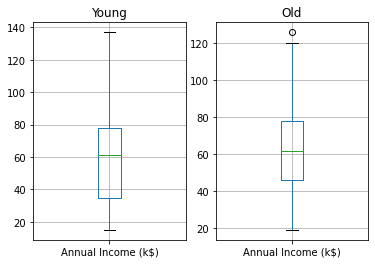

In [30]:
df_yound = customers[customers.Age <=35]
df_old = customers[customers.Age >35]

fig, axes = plt.subplots(1,2) # create figure and axes
df_yound.boxplot(column=["Annual Income (k$)"],   ax=axes.flatten()[0])
axes.flatten()[0].set_title("Young")

df_old.boxplot(column=["Annual Income (k$)"],   ax=axes.flatten()[1])
axes.flatten()[1].set_title("Old")

plt.show()

# box plot on Spending Score (1-100) vs all

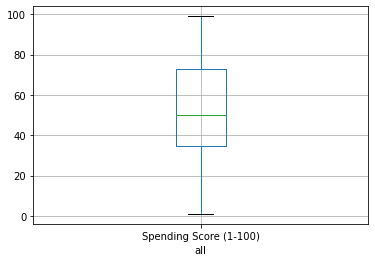

In [31]:
customers.boxplot(column=["Spending Score (1-100)"],showfliers=True)
plt.xlabel("all")
plt.show()


# box plot on Spending Score (1-100) vs male/female

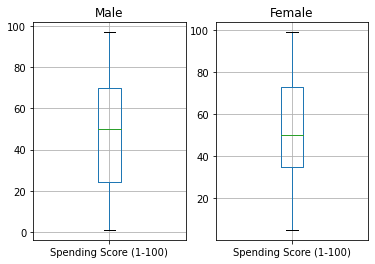

In [32]:
df_male = customers[customers.Gender =='Male']
df_female = customers[customers.Gender == 'Female']


fig, axes = plt.subplots(1,2) # create figure and axes
df_male.boxplot(column=["Spending Score (1-100)"],   ax=axes.flatten()[0])
axes.flatten()[0].set_title("Male")

df_female.boxplot(column=["Spending Score (1-100)"],   ax=axes.flatten()[1])
axes.flatten()[1].set_title("Female")

plt.show()

# box plot on Spending Score (1-100) vs young/old

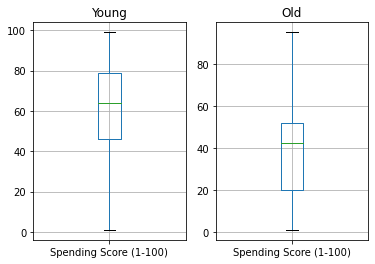

In [33]:
df_yound = customers[customers.Age <=35]
df_old = customers[customers.Age >35]

fig, axes = plt.subplots(1,2) # create figure and axes
df_yound.boxplot(column=["Spending Score (1-100)"],   ax=axes.flatten()[0])
axes.flatten()[0].set_title("Young")

df_old.boxplot(column=["Spending Score (1-100)"],   ax=axes.flatten()[1])
axes.flatten()[1].set_title("Old")

plt.show()

#  scatter

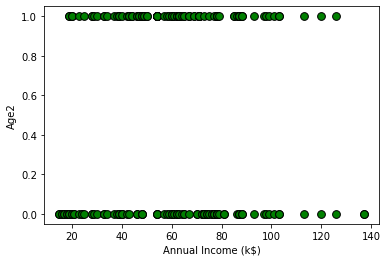

In [34]:
xx = customers["Annual Income (k$)"]
yy = customers["Age2"]
plt.scatter(xx, yy, 60, edgecolors='black', c='green')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Age2")
#plt.legend()
plt.show()


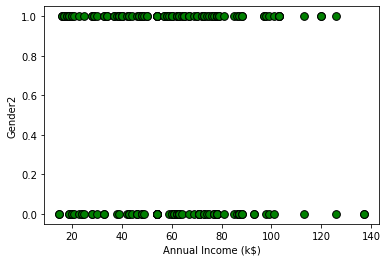

In [35]:
xx = customers["Annual Income (k$)"]
yy = customers["Gender2"]
plt.scatter(xx, yy, 60, edgecolors='black', c='green')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Gender2")
#plt.legend()
plt.show()


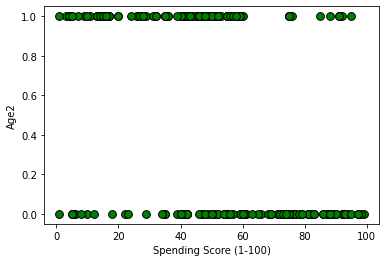

In [36]:
xx = customers["Spending Score (1-100)"]
yy = customers["Age2"]
plt.scatter(xx, yy, 60, edgecolors='black', c='green')

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Age2")
#plt.legend()
plt.show()

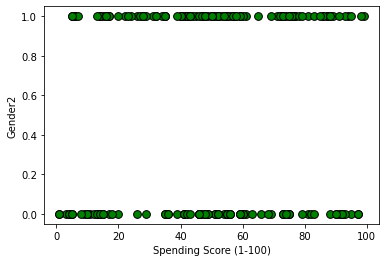

In [37]:
xx = customers["Spending Score (1-100)"]
yy = customers["Gender2"]
plt.scatter(xx, yy, 60, edgecolors='black', c='green')

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Gender2")
#plt.legend()
plt.show()

# Annual Income (k$) - Spending Score (1-100) scatter

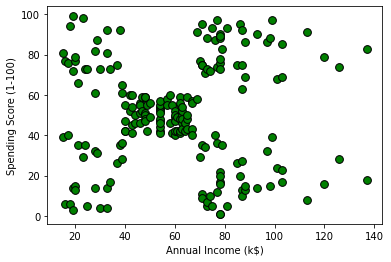

In [38]:
xx = customers["Annual Income (k$)"]
yy = customers["Spending Score (1-100)"]
plt.scatter(xx, yy, 60, edgecolors='black', c='green')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
#plt.legend()
plt.show()

# Correlation between parameteres

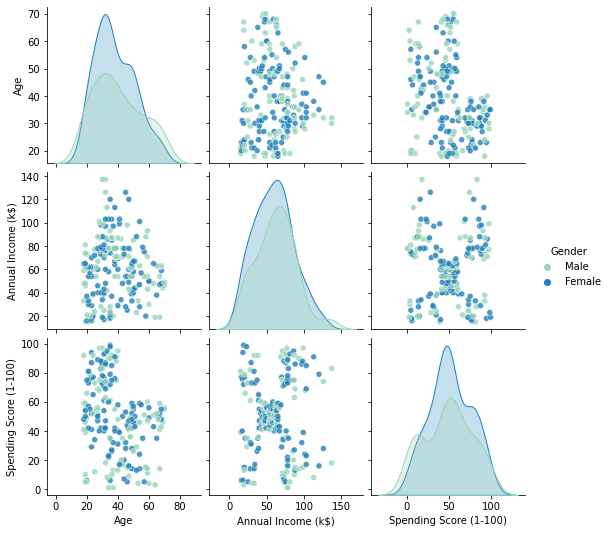

In [39]:
sns.pairplot(customers, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               #height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

# kmeans

In [40]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age2,Gender2
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [41]:
X = customers[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


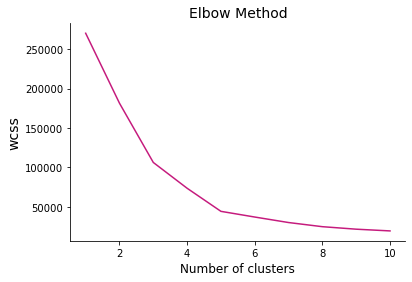

In [42]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [43]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
cluster_label = kmeans.fit_predict(X)

In [44]:
print(cluster_label)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [45]:
xx = X.values


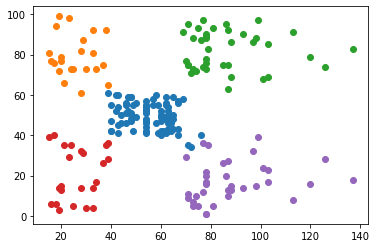

In [46]:
import matplotlib.pyplot as plt

one_cluster = xx[cluster_label == 0]
plt.scatter(one_cluster[:,0] , one_cluster[:,1])

one_cluster = xx[cluster_label == 1]
plt.scatter(one_cluster[:,0] , one_cluster[:,1])

one_cluster = xx[cluster_label == 2]
plt.scatter(one_cluster[:,0] , one_cluster[:,1])

one_cluster = xx[cluster_label == 3]
plt.scatter(one_cluster[:,0] , one_cluster[:,1])

one_cluster = xx[cluster_label == 4]
plt.scatter(one_cluster[:,0] , one_cluster[:,1])

plt.show()

In [47]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [  "Annual Income", "Spending"])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Annual Income,Spending,ClusterID
0,55.296296,49.518519,0
1,25.727273,79.363636,1
2,86.538462,82.128205,2
3,26.304348,20.913043,3
4,88.200000,17.114286,4


In [48]:
X_new = np.array([[50.0, 50.0]]) 
 
new_customer = kmeans.predict(X_new)
print("The new customer belongs to segment {}".format(new_customer[0]))

The new customer belongs to segment 0


# pca and kmeans

In [49]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age2,Gender2
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,0,1


In [50]:
X = customers[["Annual Income (k$)","Spending Score (1-100)","Age2","Gender2"]]
X.head()

,Annual Income (k$),Spending Score (1-100),Age2,Gender2
0,15,39,0,0
1,15,81,0,0
2,16,6,0,1
3,16,77,0,1
4,17,40,0,1


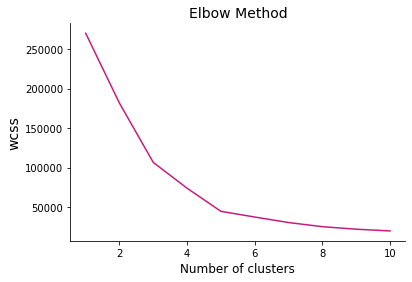

In [51]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [52]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

In [53]:
print(pca.components_)

[[ 9.65173026e-01  2.61608557e-01 -1.19787217e-03 -7.46656159e-04]
 [-2.61608666e-01  9.65141769e-01 -7.77062843e-03  1.37428894e-03]]


In [54]:
print(pca.explained_variance_)

[691.65598169 665.07664715]


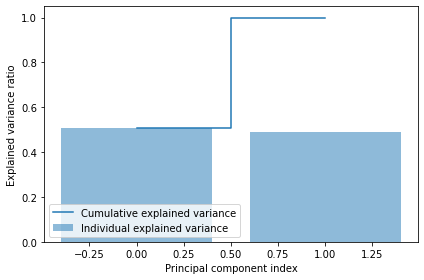

In [55]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_exp_var_pca = np.cumsum(exp_var_pca)

#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp_var_pca)), cum_sum_exp_var_pca, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [56]:
# Transform samples using the PCA fit
pca_nd = pca.transform(X)

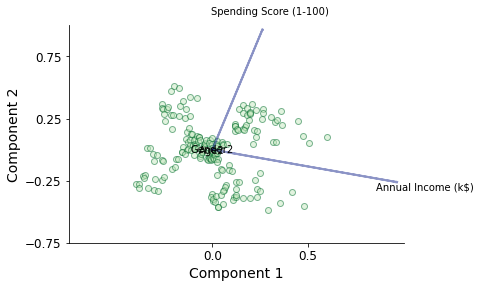

In [57]:
extra_graphs.biplot(pca_nd[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)

In [58]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)


In [59]:
print(y_means)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


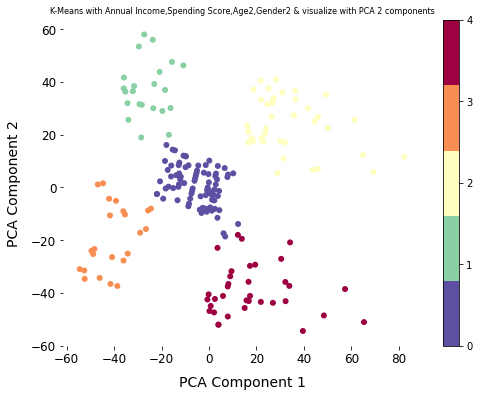

In [60]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_nd[:, 0], pca_nd[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5))
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("PCA Component 1", size = 14, labelpad=10)
plt.ylabel("PCA Component 2", size = 14, labelpad=10)

plt.title('K-Means with Annual Income,Spending Score,Age2,Gender2 & visualize with PCA 2 components', size=8)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

# Annual Income (k$) - Spending Score (1-100) scatter plot
# male and female

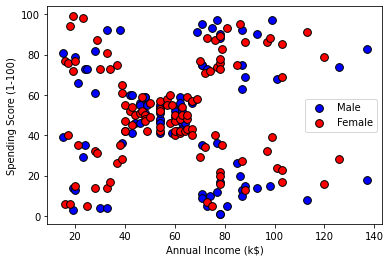

In [61]:
df_male = customers[customers.Gender =='Male']
df_female = customers[customers.Gender == 'Female']

x_male = df_male["Annual Income (k$)"]
y_male = df_male["Spending Score (1-100)"]
x_female = df_female["Annual Income (k$)"]
y_female = df_female["Spending Score (1-100)"]


plt.scatter(x_male, y_male, 60, edgecolors='black', c='blue', label = 'Male')
plt.scatter(x_female, y_female, 60, edgecolors='black', c='red', label = 'Female')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Annual Income (k$) - Spending Score (1-100) scatter plot
# yound and old

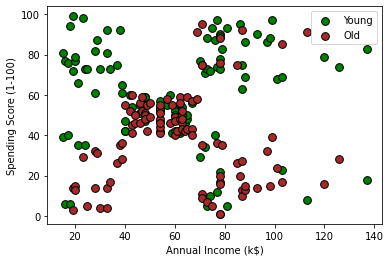

In [62]:

df_young = customers[customers.Age <=35]
df_old = customers[customers.Age >35]

x_young = df_young["Annual Income (k$)"]
y_young = df_young["Spending Score (1-100)"]
x_old = df_old["Annual Income (k$)"]
y_old = df_old["Spending Score (1-100)"]


plt.scatter(x_young, y_young, 60, edgecolors='black', c='green', label = 'Young')
plt.scatter(x_old, y_old, 60, edgecolors='black', c='brown', label = 'Old')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()